In [1]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision import transforms
from torchvision.transforms.functional import to_pil_image

import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
image_label = pd.read_csv('image_label.csv')

In [3]:
image_label.head()

,id,path,file_name,absolute_path,label
0,000001,000001_female_Asian_45,incorrect_mask.jpg,/opt/ml/input/data/train/images/000001_female_...,10
1,000001,000001_female_Asian_45,mask4.jpg,/opt/ml/input/data/train/images/000001_female_...,4
2,000001,000001_female_Asian_45,mask2.jpg,/opt/ml/input/data/train/images/000001_female_...,4
3,000001,000001_female_Asian_45,mask1.jpg,/opt/ml/input/data/train/images/000001_female_...,4
4,000001,000001_female_Asian_45,mask3.jpg,/opt/ml/input/data/train/images/000001_female_...,4


In [4]:
image_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18900 entries, 0 to 18899
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             18900 non-null  object
 1   path           18900 non-null  object
 2   file_name      18900 non-null  object
 3   absolute_path  18900 non-null  object
 4   label          18900 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 738.4+ KB


In [7]:
# 간단하게 제작해본 Custom Dataset

class MaskDataset(Dataset):

    def __init__(self,table,transform:bool=True):
        self.table = table
        self.transform = transform

        self.x, self.y = self.load_data()

    def image_transforms(self,x):
        return transforms.Compose([
            transforms.Resize(224),
            transforms.ToTensor()
        ])(x)

    def load_data(self):
        x,y = [],[]
        for i in tqdm(range(len(self.table))):
            im = Image.open(self.table['absolute_path'][i])

            if self.transform:
                im = self.image_transforms(im)
            
            x.append(im)
            y.append(torch.tensor(self.table['label'][i]))
        return x, y

    def __len__(self):
        return len(self.y)
    
    def __getitem__(self,idx):
        return self.x[idx], self.y[idx]

In [8]:
mask_dataset = MaskDataset(image_label)

100%|██████████| 18900/18900 [02:08<00:00, 147.23it/s]


In [9]:
len(mask_dataset)

18900

In [10]:
mask_loader = DataLoader(mask_dataset, shuffle=True)

In [11]:
x,y = next(iter(mask_loader))

In [12]:
x.shape

torch.Size([1, 3, 298, 224])

In [13]:
y

tensor([12])

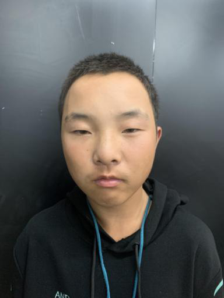

In [14]:
to_pil_image(x.view(x.shape[1:]))